In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df=pd.read_excel('fossil.xlsx')
df.head()

C:\Users\JESSICA\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Year,Total,Gas,Liquids,Solids,Production,Flaring,Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [6]:
df.shape

(263, 8)

In [7]:
df.describe()

,Year,Total,Gas,Liquids,Solids,Production,Flaring,Capita
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,64.000000
mean,1882.000000,1491.460076,202.920152,526.604563,708.460076,39.741445,13.752852,1.064375
std,76.065761,2393.608277,428.249808,972.403481,925.645035,94.172783,26.852078,0.182181
min,1751.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.650000
25%,1816.500000,13.500000,0.000000,0.000000,13.500000,0.000000,0.000000,0.962500
50%,1882.000000,256.000000,0.000000,4.000000,252.000000,0.000000,0.000000,1.110000
75%,1947.500000,1405.500000,71.500000,342.000000,1055.000000,13.500000,0.000000,1.165000
max,2013.000000,9776.000000,1806.000000,3216.000000,4131.000000,554.000000,110.000000,1.360000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        263 non-null    int64  
 1   Total       263 non-null    int64  
 2   Gas         263 non-null    int64  
 3   Liquids     263 non-null    int64  
 4   Solids      263 non-null    int64  
 5   Production  263 non-null    int64  
 6   Flaring     263 non-null    int64  
 7   Capita      64 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.6 KB


In [9]:
df.isna().sum()

Year            0
Total           0
Gas             0
Liquids         0
Solids          0
Production      0
Flaring         0
Capita        199
dtype: int64

In [12]:
df=df.dropna()
df

,Year,Total,Gas,Liquids,Solids,Production,Flaring,Capita
199,1950,1630,97,423,1070,18,23,0.65
200,1951,1767,115,479,1129,20,24,0.69
201,1952,1795,124,504,1119,22,26,0.69
202,1953,1841,131,533,1125,24,27,0.69
203,1954,1865,138,557,1116,27,27,0.69
...,...,...,...,...,...,...,...,...
258,2009,8641,1580,3065,3517,415,64,1.26
259,2010,9137,1700,3129,3795,448,66,1.32
260,2011,9508,1762,3158,4027,496,64,1.36
261,2012,9671,1787,3214,4086,520,65,1.36


In [13]:
df.shape

(64, 8)

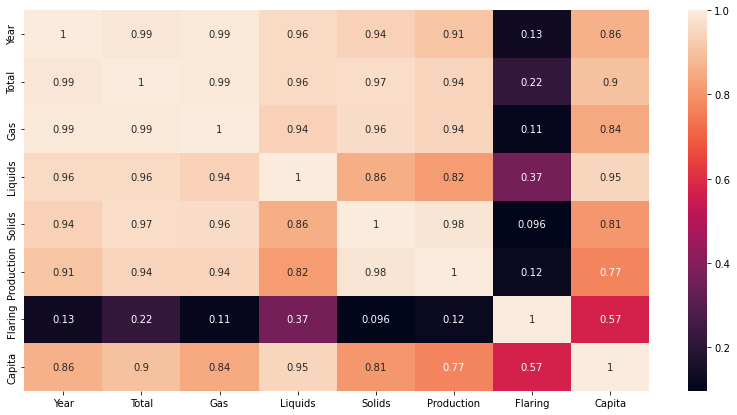

In [15]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
X=df.iloc[:, 1:-1].values
Y=df.iloc[:, -1].values
Y

array([0.65, 0.69, 0.69, 0.69, 0.69, 0.74, 0.78, 0.79, 0.8 , 0.83, 0.85,
       0.84, 0.86, 0.89, 0.92, 0.94, 0.97, 0.98, 1.01, 1.05, 1.1 , 1.12,
       1.14, 1.18, 1.16, 1.13, 1.18, 1.19, 1.18, 1.23, 1.19, 1.14, 1.11,
       1.08, 1.1 , 1.12, 1.13, 1.14, 1.16, 1.16, 1.15, 1.14, 1.11, 1.1 ,
       1.1 , 1.11, 1.12, 1.12, 1.1 , 1.08, 1.1 , 1.11, 1.11, 1.16, 1.2 ,
       1.23, 1.26, 1.27, 1.29, 1.26, 1.32, 1.36, 1.36, 1.36])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)


In [20]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [21]:
dt= DecisionTreeRegressor(random_state=42)
sv= SVR(kernel ='rbf')
rf= RandomForestRegressor(max_depth=5, random_state=42)

In [22]:
dt.fit(X_train, Y_train)
sv.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [23]:
pred_dt=dt.predict(X_test)
pred_rf=rf.predict(X_test)
pred_sv=sv.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test, pred_dt)))
print(np.sqrt(mean_squared_error(Y_test, pred_rf)))
print(np.sqrt(mean_squared_error(Y_test, pred_sv)))

0.020380986614602727
0.01731360589641672
0.061053198476458494
